In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
crime = pd.read_csv("C:/Users/Tara/Documents/A_GCU/DSC-540/US_violent_crime.csv", index_col=0)
# This data can be downloaded from https://www.kaggle.com/mathchi/violent-crime-rates-by-us-state  

# Show the first five rows to give a better understanding of the data:
crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
# Give statistics about each column such as the mean, standard deviation:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [26]:
# We can ask oursevles:
#    1) What states have the highest violent crime rates in the US?
#    2) What states have the lowest violent crime rates in the US?
#    3) How does the state of Tennessee compare to the other
#       states' crime rates?

In [61]:
# Standardize the data for a normal distribution for clustering:
crime_standardized = preprocessing.scale(crime)
crime_standardized = pd.DataFrame(crime_standardized)

C:\Users\Tara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


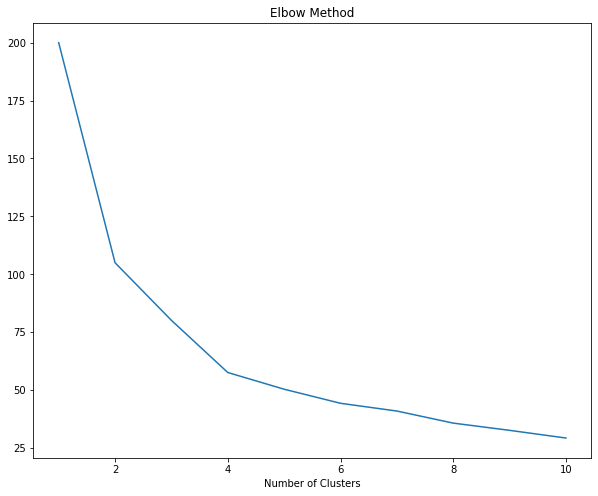

In [60]:
# Begin creating the Kmeans model by determining the optimal number of clusters:

plt.figure(figsize=(10, 8))
emp = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_standardized)
    emp.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), emp)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

In [39]:
# The plot above reveals that 4 is the optimal number of clusters.

# Now implement a Kmeans model:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_standardized)
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [59]:
# Create list:
cluster = list(y_kmeans)
# Add the new list to the data:
crime['cluster'] = cluster

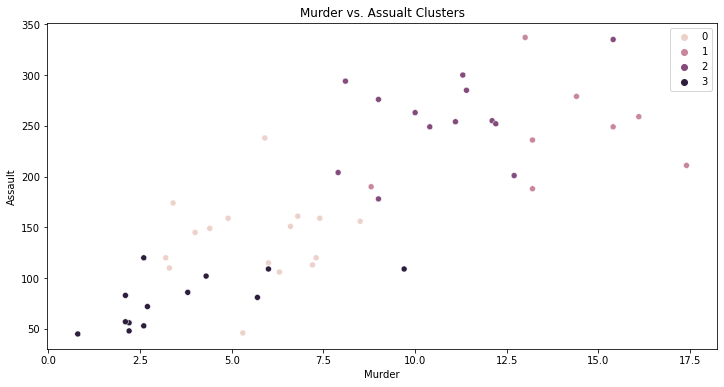

In [41]:
# Plot the distribution of states based on murder and assault with the four clusters shown:
plt.figure(figsize=(12,6))
sns.scatterplot(x = crime['Murder'], y = crime['Assault'], hue = y_kmeans)
plt.title("Murder vs. Assualt Clusters")
plt.show()

In [51]:
# Cluster 3, which has the highest violent crime rate in three of the four categories:
crime[crime['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Florida,15.4,335,80,31.9,2
Illinois,10.4,249,83,24.0,2
Maryland,11.3,300,67,27.8,2
Michigan,12.1,255,74,35.1,2
Missouri,9.0,178,70,28.2,2
Nevada,12.2,252,81,46.0,2


In [58]:
# Cluster 4, which has the lowest violent crime rates:
crime[crime['cluster']==3]

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,3
Iowa,2.2,56,57,11.3,3
Kentucky,9.7,109,52,16.3,3
Maine,2.1,83,51,7.8,3
Minnesota,2.7,72,66,14.9,3
Montana,6.0,109,53,16.4,3
Nebraska,4.3,102,62,16.5,3
New Hampshire,2.1,57,56,9.5,3
North Dakota,0.8,45,44,7.3,3
South Dakota,3.8,86,45,12.8,3


In [53]:
# Cluster 2, for comparison:
crime[crime['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Arkansas,8.8,190,50,19.5,1
Georgia,17.4,211,60,25.8,1
Louisiana,15.4,249,66,22.2,1
Mississippi,16.1,259,44,17.1,1
North Carolina,13.0,337,45,16.1,1
South Carolina,14.4,279,48,22.5,1
Tennessee,13.2,188,59,26.9,1


In [57]:
# Cluster 1, for comparison:
crime[crime['cluster']==0]

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Hawaii,5.3,46,83,20.2,0
Indiana,7.2,113,65,21.0,0
Kansas,6.0,115,66,18.0,0
Massachusetts,4.4,149,85,16.3,0
New Jersey,7.4,159,89,18.8,0
Ohio,7.3,120,75,21.4,0
Oklahoma,6.6,151,68,20.0,0
Oregon,4.9,159,67,29.3,0


In [46]:
# For question 1, the states with the highest crime rates are found in cluster 2 which include Illinois, Texas, New York, California,
# and Nevada, amongst others.

# For question 2, the states with the lowest crime rates are found in cluster 3 which include Maine, North and South Dakota, 
# Kentucky, Idaho, and Wisconsin. 

# To answer question 3, Tennesse falls in cluster 1 which has medium-low urban population, murder, and rape rates with
# medium-high assault rate.

In [47]:
# As for public use of data, it is important to acknowledge where the data comes from and that the data analysis did not 
# compile the data themselves. However, citing sources is always important as it is not ethical and could result in very 
# serious punishments if proper citations are not made. 

In [48]:
# Resources:

# Mehmet, A. (n.d.). Violent Crime Rates by US State. Kaggle. 
# https://www.kaggle.com/mathchi/violent-crime-rates-by-us-state

# Sotha, A. (n.d.). US Crime Rate - K-means Clustering. Kaggle.
# https://www.kaggle.com/akshayreddykotha/us-crime-rate-k-means-clustering

# zeydustaoglu. (n.d.). Using with K_Means and Hierarchical Clustering. Kaggle.
# https://www.kaggle.com/zeydustaoglu/using-with-k-means-and-hierarchical-clustering